In [49]:
import numpy as np
from scipy.special import j1
from scipy.integrate import quad
from scipy.special import loggamma
import matplotlib.pyplot as plt

In [50]:
# define complex integration
def complex_quadrature(func, a, b, **kwargs):
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    real_integral = quad(real_func, a, b, **kwargs)
    imag_integral = quad(imag_func, a, b, **kwargs)
    return (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])

In [ ]:
# probably need to worry abourt divide by zero errors
def h_func(arg, diam):
    num = j1(np.pi*diam*arg)**2
    denom = (np.pi*diam*arg)**2
    fac = np.pi*diam**2
    if denom == 0:
        hfun = fac*1/4
    else:
        hfun = fac*num/denom
    return hfun

def an_int(freq, diam):
    prefac = (np.pi)**(1j*freq)*(diam)**(1j*freq+1)/(2*np.sqrt(np.pi))
    num = loggamma(1+ 1j*freq/2) + loggamma(1/2 - 1j*freq/2) - loggamma(3/2 + 1j*freq/2) - loggamma(5/2 + 1j*freq/2)
    return prefac*np.exp(num)

In [74]:
period = 200e-6
print(np.sqrt(2)/period)

7071.067811865475


In [121]:
alpha = 0#7071#1000
diameter = 0.125
max_freq = 10#4000
freqs = np.linspace(-max_freq, max_freq, 1024)
num_int = []
eps = 1e-6
for freq in freqs:
    if alpha >= eps:
        num_int.append(complex_quadrature(lambda tau: h_func(tau-alpha,diameter)*tau**(-1j*freq), eps, alpha - eps,limit=50)[0]
                    + complex_quadrature(lambda tau: h_func(tau-alpha,diameter)*tau**(-1j*freq), alpha + eps, np.inf,limit=50)[0])
    else:
        num_int.append(complex_quadrature(lambda tau: h_func(tau-alpha,diameter)*tau**(-1j*freq),eps,np.inf,limit=50)[0])

a_int = an_int(freqs, diameter)

/var/folders/2s/299fsjvd5w13x4x_w7x554fh0000gn/T/ipykernel_8022/1216525660.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  real_integral = quad(real_func, a, b, **kwargs)
/var/folders/2s/299fsjvd5w13x4x_w7x554fh0000gn/T/ipykernel_8022/1216525660.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from sp

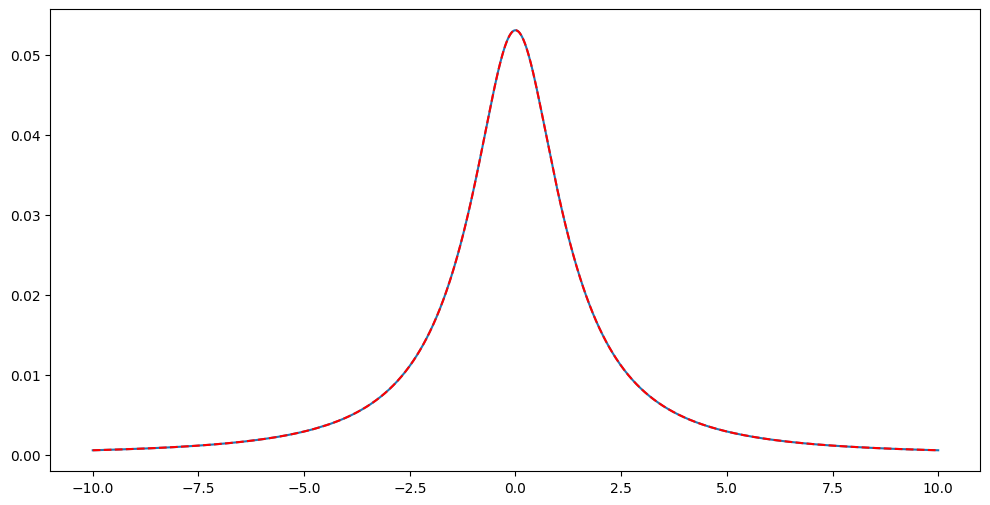

In [123]:
plt.figure(figsize=(12,6))
plt.plot(freqs, np.abs(num_int))
plt.plot(freqs, np.abs(a_int), linestyle='--', color='red')
plt.show()
# IT WORKS

In [362]:
from scipy.special import factorial

def c_n(n):
    prefac = (-1)**n/(2**(2*n+2))
    s = 0
    for k in range(n+1):
        s += np.exp(- loggamma(k+1) - loggamma(k+2) - loggamma(n-k+1) -loggamma(n-k+2))
    #s = np.exp(s)
    s *= prefac
    return s

# gonna try and write to avoid overflows:
def J_minus(freq, alpha, diam, n_max):
    a = np.pi * diam * alpha
    J_m = 0 
    # n = np.arange(n_max+1)
    # gs = loggamma(2*n+1) + loggamma(-1j*freq+1) - loggamma(2*n+2 -1j*freq)
    # exponents = (2*n + 1 - 1j*freq)*np.log(a) + gs
    # logcn     = np.log(c_n(n))
    # log_terms = logcn + exponents
    # M = np.max(log_terms.real)
    # scaled = np.exp(log_terms - M)
    # J_m = np.sum(scaled) * np.exp(M)

    # exponents = []
    # logcn = []
    # for n in range(n_max+1):
    #     gs = loggamma(2*n+1) + loggamma(-1j*freq+1) - loggamma(2*n+2 -1j*freq)
    #     exponents.append((2*n + 1 - 1j*freq)*np.log(a) + gs)
    #     logcn.append(np.log(c_n(n).real))

    # print(exponents)
    # print(logcn)
    # exponents = np.array(exponents)
    # logcn = np.array(logcn)
    # log_terms = exponents + logcn
    # M = np.max(log_terms.real)
    # scaled = np.exp(log_terms - M)
    # J_m = np.sum(scaled) * np.exp(M)
    for n in range(n_max+1):
        gs = loggamma(2*n+1) + loggamma(-1j*freq+1) - loggamma(2*n+2 -1j*freq)
        J_m += c_n(n) * np.exp(np.log(a)*(2*n+1-1j*freq)) * np.exp(gs)
    
    return J_m

In [135]:
alpha = 1
diameter = 0.125
max_freq = 10#4000
freqs = np.linspace(-max_freq, max_freq, 1024)
Jmin = J_minus(freqs, alpha, diameter, 20)

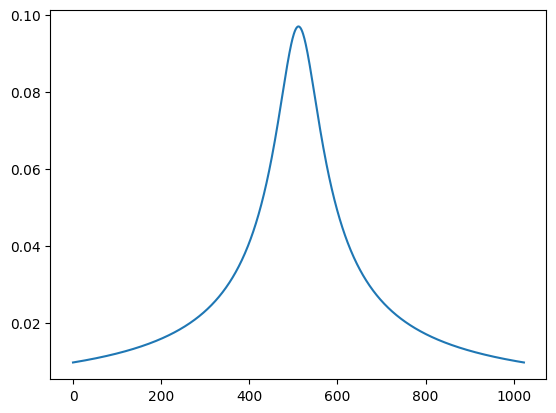

In [ ]:
plt.plot(freqs, np.abs(Jmin))
plt.show()
# Jmin converges clearly

In [563]:
def J_plus(freq, alpha, diam, n_max):
    a = np.pi * diam * alpha
    J_p = 0 
    for n in range(n_max+1):
        gs = np.log(a)*(2*n+1-1j*freq) + loggamma(2*n+1) + loggamma(1j*freq-2*n-1) - loggamma(1j*freq)
        J_p += c_n(n) * np.exp(gs)
    
    return J_p

In [217]:
alpha = 100
diameter = 0.125
max_freq = 1#4000
freqs = np.linspace(-max_freq, max_freq, 32)
Jmin = J_minus(freqs, alpha, diameter, 40)
Jplu = J_plus(freqs, alpha, diameter, 40)
anint = an_int(freqs, diameter)
Jtot = np.pi**(1j*freqs)*diameter**(1j*freqs+1) * (Jplu + Jmin)
num_int = []
eps = 1e-6
for freq in freqs:
    if alpha >= eps:
        num_int.append(complex_quadrature(lambda tau: h_func(tau-alpha,diameter)*tau**(-1j*freq), eps, alpha - eps,limit=50)[0]
                    + complex_quadrature(lambda tau: h_func(tau-alpha,diameter)*tau**(-1j*freq), alpha + eps, np.inf,limit=50)[0])
    else:
        num_int.append(complex_quadrature(lambda tau: h_func(tau-alpha,diameter)*tau**(-1j*freq),eps,np.inf,limit=50)[0])

/var/folders/2s/299fsjvd5w13x4x_w7x554fh0000gn/T/ipykernel_8022/1216525660.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  real_integral = quad(real_func, a, b, **kwargs)
/var/folders/2s/299fsjvd5w13x4x_w7x554fh0000gn/T/ipykernel_8022/1216525660.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from sp

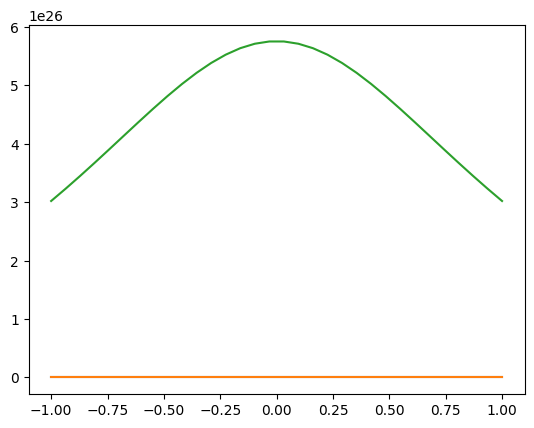

In [218]:
#plt.plot(freqs, np.abs(Jtot))
plt.plot(freqs, np.abs(anint))
plt.plot(freqs, np.abs(num_int))
# plt.plot(freqs, np.abs(Jplu))
plt.plot(freqs, np.abs(Jmin))
plt.plot()
plt.show()

In [219]:
num_int2 = []
eps = 1e-6
a = np.pi*alpha*diameter
for freq in freqs:
    num_int2.append(np.pi**(1j*freq) * diameter**(1j*freq+1) * 
                    (complex_quadrature(lambda x: j1(x)**2/x**2 * (a-x)**(-1j*freq), 0, a,limit=50)[0]
                    + complex_quadrature(lambda x: j1(x)**2/x**2 * (a+x)**(-1j*freq), 0, np.inf,limit=50)[0]))


/var/folders/2s/299fsjvd5w13x4x_w7x554fh0000gn/T/ipykernel_8022/1216525660.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  real_integral = quad(real_func, a, b, **kwargs)
/var/folders/2s/299fsjvd5w13x4x_w7x554fh0000gn/T/ipykernel_8022/1216525660.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from sp

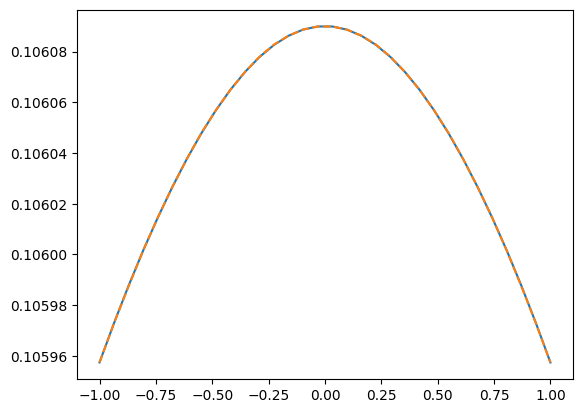

In [220]:
plt.plot(freqs,np.abs(num_int2))
plt.plot(freqs, np.abs(num_int), linestyle='--')
plt.show()
# perfect, works

In [221]:
J_min_num = []
for freq in freqs:
    J_min_num.append((complex_quadrature(lambda x: j1(x)**2/x**2 * (a-x)**(-1j*freq), 0, a,limit=50)[0]))

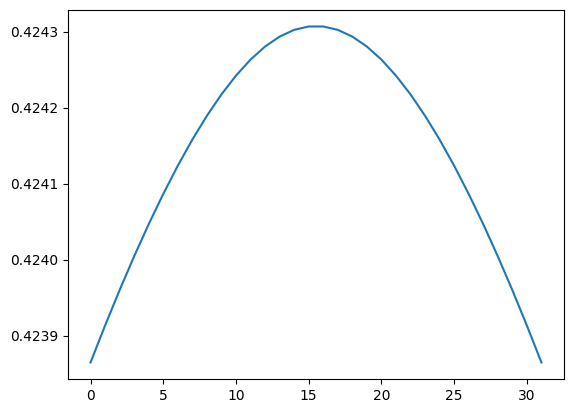

In [222]:
plt.plot(np.abs(J_min_num))
plt.show()
# what we have to ensure we have.

In [306]:
def J_min_int(y, freq, alpha, diam, n_max):
    a = alpha * np.pi * diam
    Jminint = 0
    for n in range(n_max+1):
        Jminint += c_n(n) * a**(2*n) * y**(2*n) * a**(-1j*freq+1) * (1-y)**(-1j*freq)
    return Jminint
alpha = 10
a = np.pi*alpha*diameter
J_min_num = []
for freq in freqs:
    J_min_num.append((complex_quadrature(lambda x: j1(x)**2/x**2 * (a-x)**(-1j*freq), 0, a,limit=50)[0]))
J_min_num2 = []
for freq in freqs:
    print(freq)
    J_min_num2.append(complex_quadrature(lambda y: J_min_int(y, freq, alpha, diameter, 20), 0, 1, limit=50)[0])

# Jminnum2 works for alpha nice and small... totally breaks for alpha larger.

-1.0
-0.935483870967742
-0.8709677419354839
-0.8064516129032258
-0.7419354838709677
-0.6774193548387097
-0.6129032258064516
-0.5483870967741935
-0.4838709677419355
-0.4193548387096775
-0.3548387096774194
-0.29032258064516125
-0.22580645161290325
-0.16129032258064524
-0.09677419354838712
-0.032258064516129004
0.032258064516129004
0.09677419354838701
0.16129032258064502
0.22580645161290325
0.29032258064516125
0.35483870967741926
0.4193548387096775
0.4838709677419355
0.5483870967741935
0.6129032258064515
0.6774193548387095
0.7419354838709677
0.8064516129032258
0.8709677419354838
0.935483870967742
1.0


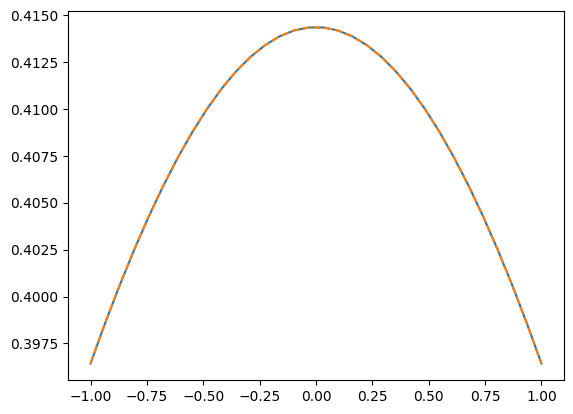

In [307]:
plt.plot(freqs, np.abs(J_min_num2))
plt.plot(freqs, np.abs(J_min_num), linestyle='--')
plt.show()

In [365]:
alpha = 30
a = np.pi*alpha*diameter
print(a)
J_min_num3 = []
for freq in freqs:
    J_min_num3.append(np.sum(np.fromiter((c_n(n) * a**(2*n+1-1j*freq) * (complex_quadrature(lambda y: y**(2*n)/(1-y)**(1j*freq), 0, 1, limit=50)[0]) 
                                          for n in range(120)), 
                                          dtype=np.complex128)))
    
J_min_num = []
for freq in freqs:
    J_min_num.append((complex_quadrature(lambda x: j1(x)**2/x**2 * (a-x)**(-1j*freq), 0, a,limit=50)[0]))

newJm = J_minus(freqs, alpha, diameter, 100)

11.780972450961723


/var/folders/2s/299fsjvd5w13x4x_w7x554fh0000gn/T/ipykernel_8022/1216525660.py:7: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  real_integral = quad(real_func, a, b, **kwargs)
/var/folders/2s/299fsjvd5w13x4x_w7x554fh0000gn/T/ipykernel_8022/1216525660.py:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  imag_integral = quad(imag_func, a, b, **kwargs)


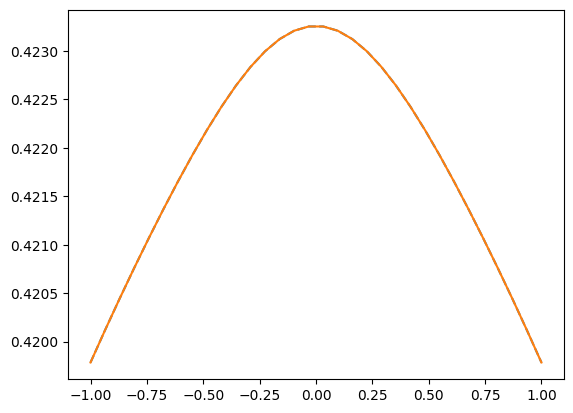

In [366]:
#plt.plot(freqs, np.abs(J_min_num3))
#plt.plot(freqs, np.abs(J_min_num2), linestyle=':')
plt.plot(freqs, np.abs(J_min_num), linestyle='--')
plt.plot(freqs, np.abs(newJm))
plt.show()

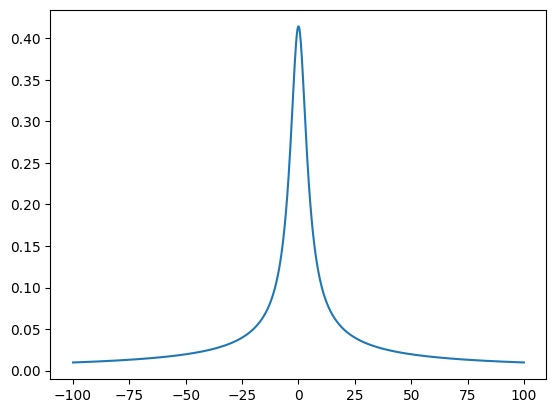

In [399]:
plt.plot(np.linspace(-100,100,1024), np.abs(J_minus(np.linspace(-100,100,1024), 10, 0.125, 10)))
plt.show()
# need to not have an overflow error
# the exponentiation causes it a**2n
# but its chill... just gonna deal with low alpha/a, until I can find a hypergeometric representation?

In [ ]:
# work on Jplus now
freqs = np.linspace(-10,10,64)
alpha = 0.1
a = np.pi*alpha*diameter
J_min_num = []
for freq in freqs:
    J_min_num.append((complex_quadrature(lambda x: j1(x)**2/x**2 * (a-x)**(-1j*freq), 0, a,limit=50)[0]))
    
J_plus_num = []
for freq in freqs:
    J_plus_num.append((complex_quadrature(lambda x: j1(x)**2/x**2 * (a+x)**(-1j*freq), 0, np.inf,limit=50)[0]))

num_int = []
eps = 1e-6
for freq in freqs:
    if alpha >= eps:
        num_int.append(complex_quadrature(lambda tau: h_func(tau-alpha,diameter)*tau**(-1j*freq), eps, alpha - eps,limit=50)[0]
                    + complex_quadrature(lambda tau: h_func(tau-alpha,diameter)*tau**(-1j*freq), alpha + eps, np.inf,limit=50)[0])
    else:
        num_int.append(complex_quadrature(lambda tau: h_func(tau-alpha,diameter)*tau**(-1j*freq),eps,np.inf,limit=50)[0])

/var/folders/2s/299fsjvd5w13x4x_w7x554fh0000gn/T/ipykernel_8022/1216525660.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  real_integral = quad(real_func, a, b, **kwargs)
/var/folders/2s/299fsjvd5w13x4x_w7x554fh0000gn/T/ipykernel_8022/1216525660.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from sp

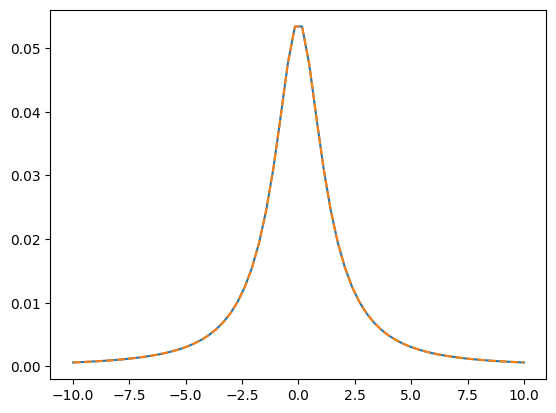

In [420]:
plt.plot(freqs, np.abs(np.pi**(1j*freqs) * diameter**(1j*freqs+1) *(np.array(J_min_num)+np.array(J_plus_num))))
plt.plot(freqs, np.abs(num_int), linestyle='--')
plt.show()
# So J_plus_num, J_min_num are initialising to the right values.. good.
# let's continue to work on J_plus_num

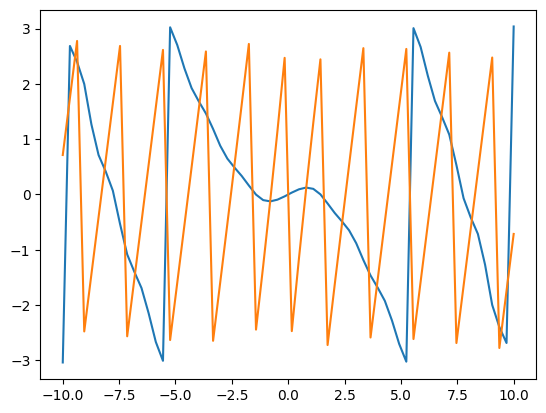

In [427]:
plt.plot(freqs, np.angle(J_plus_num))
plt.plot(freqs, np.angle(J_plus(freqs, alpha, 0.125, 10)))
plt.show()

In [431]:
# trying with sympy
from sympy import mellin_transform, besselj
from sympy.abc import x, s, a
mellin_transform(besselj(1, x-a)**2/(x-a)**2, x, s)

MellinTransform(besselj(1, a - x)**2/(a - x)**2, x, s)

In [447]:
from mpmath import hyp3f2

def J_plus_hyp(freq, alpha, diam):
    a = np.pi*alpha*diam
    Jp = (1/2) * hyp3f2(-200, (1-1j*freq)/2, (2-1j*freq)/2, 3/2, 2, -a**2 /4)
    return Jp



In [448]:
J_phyp = []
for freq in freqs:
    J_phyp.append(J_plus_hyp(freq, alpha, diameter))

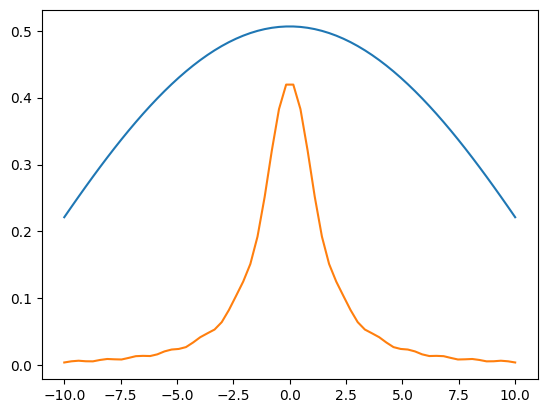

In [449]:
plt.plot(freqs, np.abs(J_phyp))
plt.plot(freqs, np.abs(J_plus_num))
plt.show()

In [ ]:
from scipy.special import gamma

def new_J_plus(freq, alpha, diam, n_max):
    a = np.pi*diam*alpha
    njp = 0
    prefac = 1/(2*np.sqrt(np.pi))
    for k in range(n_max+1):
        num = loggamma(-1j*freq+1) - loggamma(-1j*freq - k + 1) + k*np.log(a) + loggamma(1/2 + (1+k+1j*freq)/2) + loggamma(1 - (1+k+1j*freq)/2)
        denom = loggamma(k+1) + loggamma(1 + (1+k+1j*freq)/2) + loggamma(2 + (1+k+1j*freq)/2)
        njp += np.exp(num - denom)
    njp *= prefac
    return njp

def strange_J(freq, alpha, diam, n_max):
    a = np.pi*diam*alpha
    njp = 0
    prefac = 1/(2*np.sqrt(np.pi))
    for k in range(n_max+1):
        num = loggamma(-1j*freq+1) - loggamma(-1j*freq - k + 1) + k*np.log(a) + loggamma(1/2 + (2+k+1j*freq)/2) + loggamma(1 - (2+k+1j*freq)/2)
        denom = loggamma(k+1) + loggamma(1 + (2+k+1j*freq)/2) + loggamma(2 + (2+k+1j*freq)/2)
        njp += np.exp(num - denom)
    njp *= prefac
    return njp

import mpmath as mp

# Set default precision (digits)
mp.mp.dps = 50  # you can adjust this for more precision


def hyper_pfq_regularized(a_list, b_list, z):
    """
    Compute the regularized generalized hypergeometric function:
    _pF_q(a_list; b_list; z) / (Gamma(b1)*...*Gamma(bq))
    """
    # numerator: ordinary hypergeometric pFq
    num = mp.hyper(a_list, b_list, z)
    # denominator: product of Gamma(b_j)
    denom = mp.mpf(1)
    for bj in b_list:
        denom *= mp.gamma(bj)
    return num / denom


def analytic_integral(a, omega, precision=50):
    """
    Compute
        1/2 * [ a*Γ(1 - iω/2)*Γ(3/2 + iω/2)*_2~3~F_reg(..., -a^2)
              +   Γ(1/2 - iω/2)*Γ(1 + iω/2)*_2~3~F_reg(..., -a^2) ]
    where _2~3~F_reg denotes the regularized HypergeometricPFQ.

    Parameters
    ----------
    a : float or complex
        Positive real offset in the integral.
    omega : float or complex
        Frequency at which to evaluate the transform.
    precision : int, optional
        Number of decimal digits of precision (default: 50).

    Returns
    -------
    mp.mpc
        The complex-valued result of the analytic integral.
    """
    # adjust precision
    mp.mp.dps = precision

    iomega = 1j * omega
    z = -a**2

    # first term
    t1 = (a
          * mp.e**(mp.loggamma(1 - iomega/2) + mp.loggamma(3/2 + iomega/2))
          * hyper_pfq_regularized(
                [0.5 + iomega/2, 1.5 + iomega/2],
                [1.5, 2 + iomega/2, 3 + iomega/2],
                z
            )
         )

    # second term
    t2 = (mp.e**(mp.loggamma(0.5 - iomega/2) + mp.loggamma(1 + iomega/2))
          * hyper_pfq_regularized(
                [1 + iomega/2, iomega/2],
                [0.5, 1.5 + iomega/2, 2.5 + iomega/2],
                z
            )
         )

    return 0.5 * (t1 + t2)

In [824]:
# work on Jplus now
freqs = np.linspace(-6000,6000,1024)
diameter = 0.125
alpha = 7200
a = np.pi*alpha*diameter
J_min_num = []
for freq in freqs:
    J_min_num.append((complex_quadrature(lambda x: j1(x)**2/x**2 * (a-x)**(-1j*freq), 0, a,limit=50)[0]))
    
J_plus_num = []
for freq in freqs:
    J_plus_num.append((complex_quadrature(lambda x: j1(x)**2/x**2 * (a+x)**(-1j*freq), 0, np.inf,limit=50)[0]))

num_int = []
eps = 1e-6
for freq in freqs:
    if alpha >= eps:
        num_int.append(complex_quadrature(lambda tau: h_func(tau-alpha,diameter)*tau**(-1j*freq), eps, alpha - eps,limit=50)[0]
                    + complex_quadrature(lambda tau: h_func(tau-alpha,diameter)*tau**(-1j*freq), alpha + eps, np.inf,limit=50)[0])
    else:
        num_int.append(complex_quadrature(lambda tau: h_func(tau-alpha,diameter)*tau**(-1j*freq),eps,np.inf,limit=50)[0])

#ojminus = J_minus(freqs, alpha, diameter, 60)
#njplus = new_J_plus(freqs, alpha, diameter, 200)
#ojplus = J_plus(freqs, alpha, diameter, 60)

# new total int
new_int_total = []
for freq in freqs:
    new_int_total.append(analytic_integral(a, freq))
    print(freq)

#oanint = np.pi**(1j*freqs)*diameter**(1j*freqs+1)*(njplus)
best_int = np.pi**(1j*freqs)*diameter**(1j*freqs+1)*np.array(new_int_total)

/var/folders/2s/299fsjvd5w13x4x_w7x554fh0000gn/T/ipykernel_8022/1216525660.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  real_integral = quad(real_func, a, b, **kwargs)
/var/folders/2s/299fsjvd5w13x4x_w7x554fh0000gn/T/ipykernel_8022/1216525660.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from sp

-6000.0
-5988.269794721407
-5976.539589442816
-5964.809384164223
-5953.07917888563
-5941.348973607038
-5929.618768328446
-5917.8885630498535
-5906.158357771261
-5894.428152492668
-5882.6979472140765
-5870.967741935484
-5859.237536656891
-5847.5073313783
-5835.777126099707
-5824.046920821114
-5812.316715542522
-5800.58651026393
-5788.856304985337
-5777.126099706745
-5765.395894428152
-5753.66568914956
-5741.935483870968
-5730.205278592375
-5718.475073313783
-5706.744868035191
-5695.014662756598
-5683.284457478006
-5671.554252199414
-5659.824046920821
-5648.093841642229
-5636.363636363636
-5624.633431085044
-5612.903225806452
-5601.173020527859
-5589.4428152492665
-5577.712609970675
-5565.982404692082
-5554.2521994134895
-5542.521994134897
-5530.791788856305
-5519.061583577713
-5507.33137829912
-5495.601173020528
-5483.870967741936
-5472.140762463343
-5460.41055718475
-5448.680351906159
-5436.950146627566
-5425.219941348973
-5413.489736070382
-5401.759530791789
-5390.029325513196
-5378.2

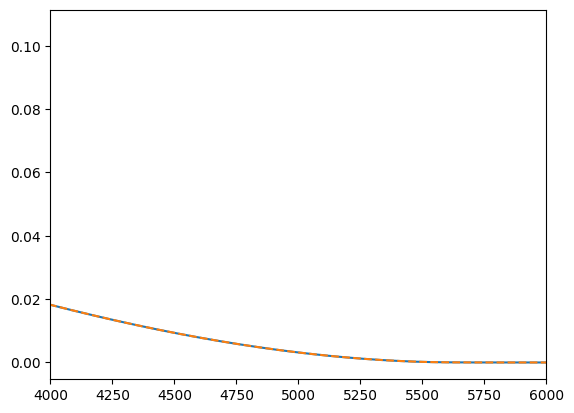

In [827]:
#plt.plot(freqs, np.angle(njplus) - np.angle(J_plus_num))
#plt.plot(freqs, np.abs(njplus) - np.abs(J_plus_num))
#plt.plot(freqs, np.angle(J_plus_num) - np.angle(ojplus))
#plt.plot(freqs,  np.abs(ojplus) - np.abs(J_plus_num))
# plt.plot(freqs, np.abs(oanint))
# plt.plot(freqs, np.abs(num_int), linestyle='--')
# plt.plot(freqs, np.abs(njplus-ojplus))
# plt.plot(freqs, np.abs(J_plus_num))
#plt.plot(freqs, np.abs(njplus))
# plt.plot(freqs, np.angle(ojplus))
# # plt.plot(freqs, np.angle(J_plus_num))
plt.xlim(4000,6000)
#plt.ylim(0,0.005)
#plt.plot(freqs, np.abs(ojplus))
plt.plot(freqs, np.abs(best_int))
plt.plot(freqs, np.abs(num_int),linestyle='--')
# looks like it actually works whodathunkit
#plt.plot(freqs, np.abs(oanint))
plt.plot()
plt.show()
# OJ plus is totally convergent in the regions that we care about.
# wait.. summing them together gives results that seem way too good to be a fluke
# is it actually the true analytic continuation, the sum of ojplus and njplus? so strange
# but we've found that ojplus completely cancels with ojminus
# so the true analytic contuation of the whole thing is njplus?
# this seems so strange... not sure how / why this came up un the algebra?
# but it seems to actually work

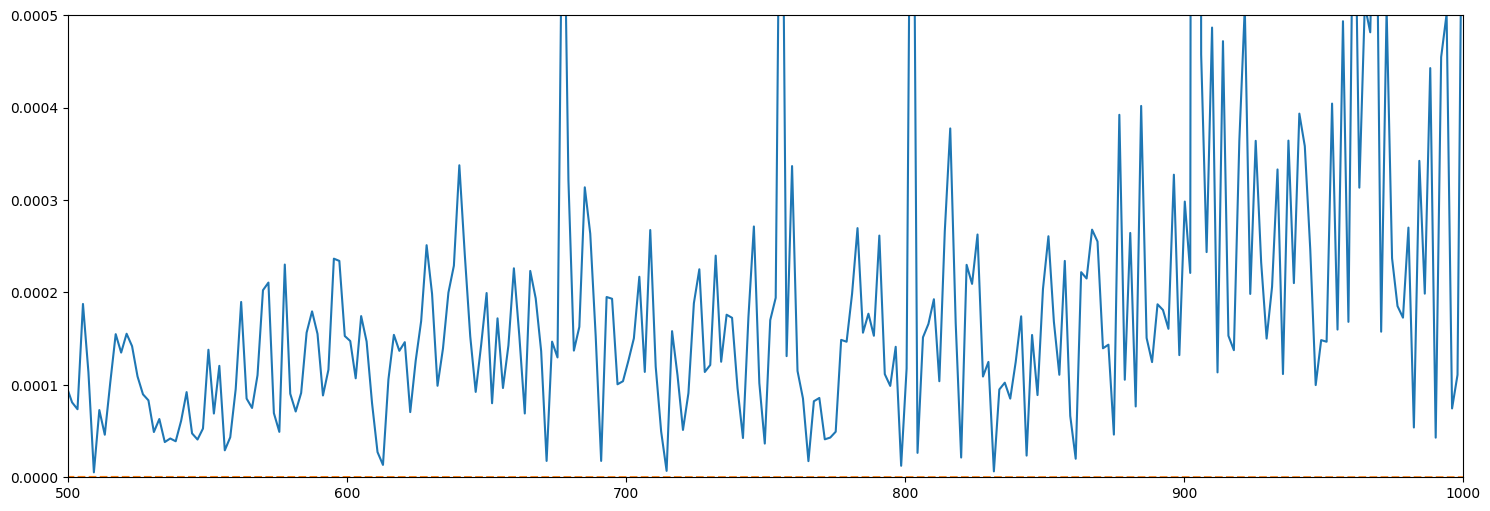

In [ ]:
plt.figure(figsize=(18,6))
#plt.plot(freqs, np.abs(num_int))
plt.plot(freqs, np.abs(np.array(J_plus_num)+np.array(J_min_num)))
#plt.plot(freqs, np.abs(ojplus+ojminus))
plt.plot(freqs, np.abs(+njplus), linestyle='--')
#plt.plot(freqs, np.abs(njplus))
# plt.plot(freqs, np.angle(J_plus_num))
# plt.plot(freqs, np.angle(ojminus))
# plt.plot(freqs, np.angle(ojplus),linestyle='--')
# plt.plot(freqs, np.angle(J_min_num), linestyle=':')
plt.xlim(500,1000)
plt.ylim(0,0.00005)
#plt.ylim(0,0.0005)
# plt.plot(freqs, np.angle(J_plus_num))
# plt.plot(freqs, np.angle(ojplus*np.exp(1j*np.pi*np.exp(-np.abs(freqs/2)))))
#plt.plot(freqs, np.angle(ojplus)-np.angle(J_plus_num))
#plt.xlim(-10,10)
# plt.plot(freqs, np.angle(ojminus))
# plt.plot(freqs, np.angle(ojplus))
plt.show()

In [800]:
result = []
for freq in freqs:
    result.append(analytic_integral(a, freq))

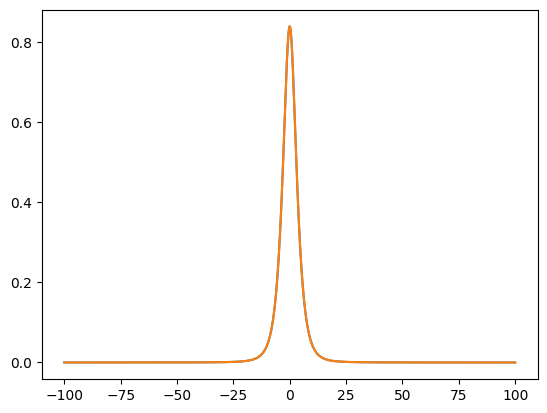

In [ ]:
plt.plot(freqs, np.abs(result))
plt.plot(freqs, np.abs(njplus))
plt.plot(freqs, n)
plt.show()

In [3]:
import zodiax as zdx

zdx.bayes.poiss_loglike(1,2)

AttributeError: 'int' object has no attribute 'model'